# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

I have worked on solutions for "unsupervised machine learning with penguins" and "supervised machine learning with penguins".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

# 1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?

In [ ]:
penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.head(20)


,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data

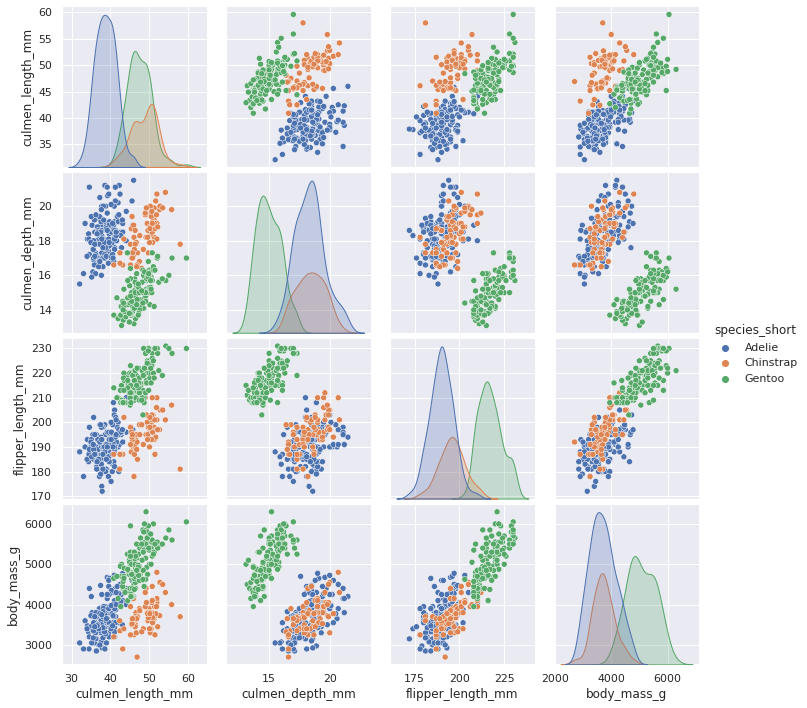

In [ ]:
sns.pairplot(penguins, hue='species_short')

In [ ]:
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


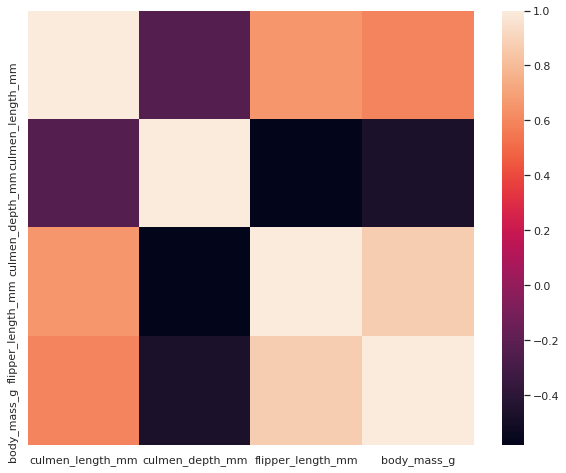

In [ ]:
sns.heatmap(penguins.corr())

# 3. Create a new dataset where you scale all numeric values with the standardscaler

In [ ]:
new_penguins = penguins[['species_short', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [ ]:
new_penguins.head()

,species_short,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [ ]:
new_penguins.isnull().sum()

species_short        0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [ ]:
new_penguins.set_index('species_short', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
new_penguins_scaled = scaler.fit_transform(new_penguins1)

In [ ]:
pd.DataFrame(new_penguins_scaled, columns=new_penguins.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,-9.024620e-17,-1.884782e-15,-4.875892e-16,9.414172e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


# 4. Perform a PCA analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model = PCA()

In [ ]:
model.fit(new_penguins_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
new_penguins_reduced = model.transform(new_penguins_scaled)

In [ ]:
new_penguins_reduced

array([[-1.84344489,  0.04770222, -0.23279416,  0.52390297],
       [-1.30676189, -0.42834824, -0.02956235,  0.40242643],
       [-1.36918099, -0.1544764 ,  0.1986723 , -0.52800677],
       ...,
       [ 2.76074201,  0.28888648, -0.42843943,  0.24071657],
       [ 1.72236378, -0.70426942, -0.27697945,  0.33851609],
       [ 2.02890193,  0.35762008, -0.16289253,  0.4422372 ]])

# 5. Investigate the explained variance of the components... do we see an 'elbow'?

In [ ]:
import numpy as np


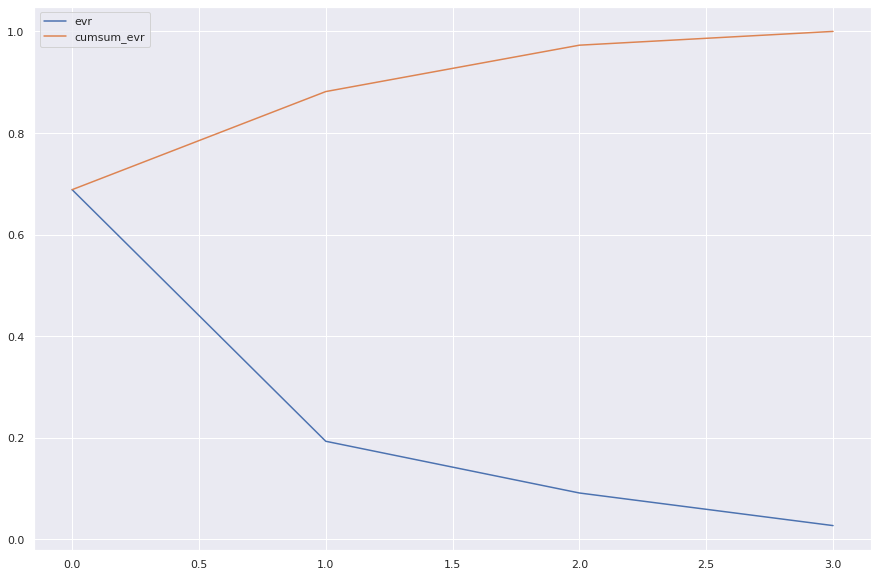

In [ ]:
plot_new_penguins = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_new_penguins.values, x = plot_new_penguins.index.get_level_values(0), hue=plot_new_penguins.index.get_level_values(1))

# 6. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?

In [ ]:
import matplotlib.pyplot as plt

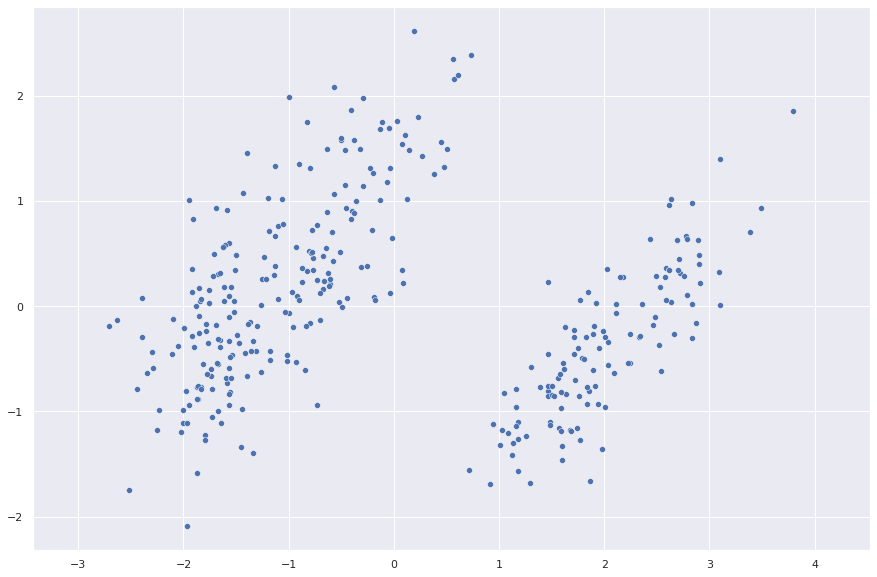

In [ ]:
sns.scatterplot(x = new_penguins_reduced[:,0], y = new_penguins_reduced[:,1])
plt.axis('equal')
plt.show()

# 7. Inspect the correlation between the components. Which variables are they mostly associated with?

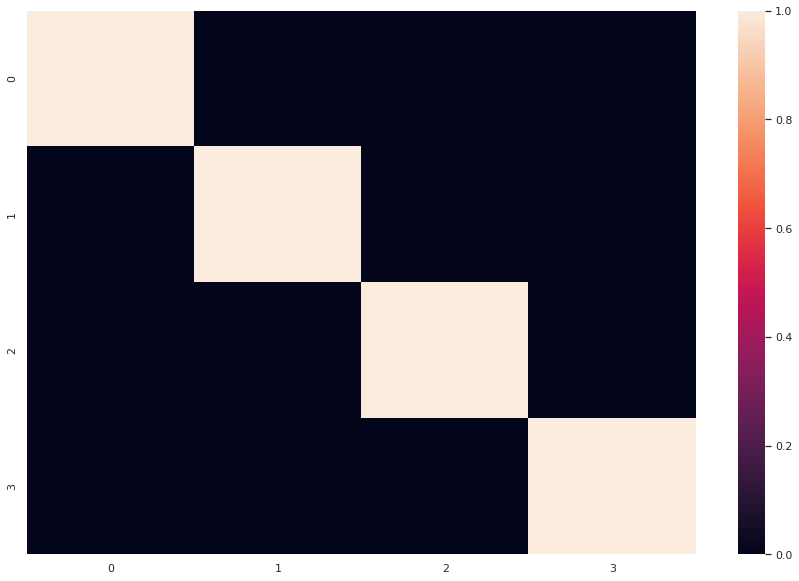

In [ ]:
sns.heatmap(pd.DataFrame(new_penguins_reduced).corr())

In [ ]:
mean = model.mean_


first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

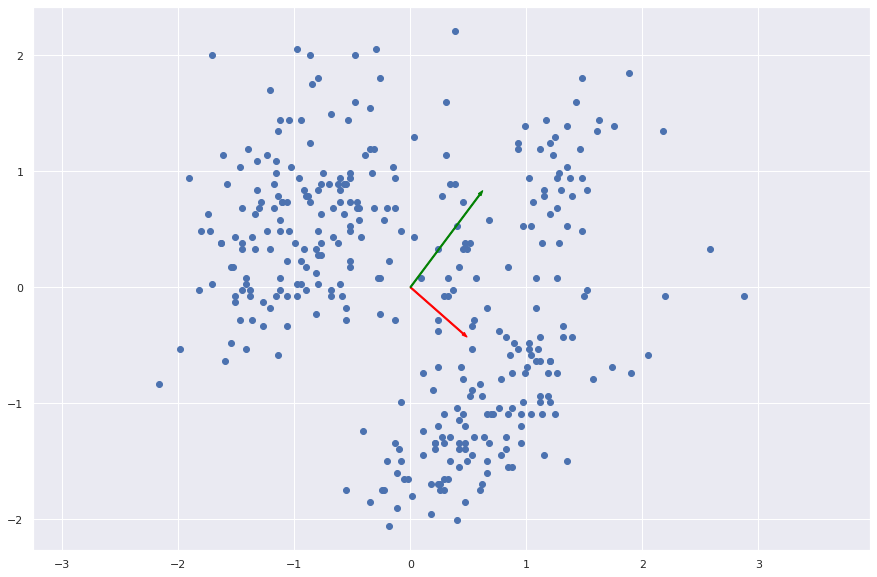

In [ ]:
plt.scatter(new_penguins_scaled[:,0], new_penguins_scaled[:,1])

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

plt.axis('equal')
plt.show()

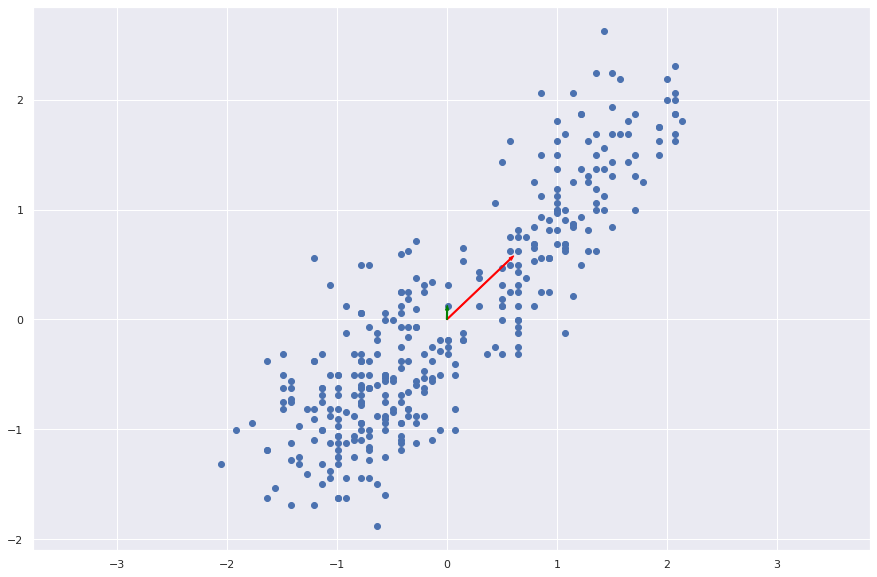

In [ ]:
plt.scatter(new_penguins_scaled[:,2], new_penguins_scaled[:,3])

plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

plt.axis('equal')
plt.show()


In [ ]:
pcscores = pd.DataFrame(new_penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=new_penguins.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

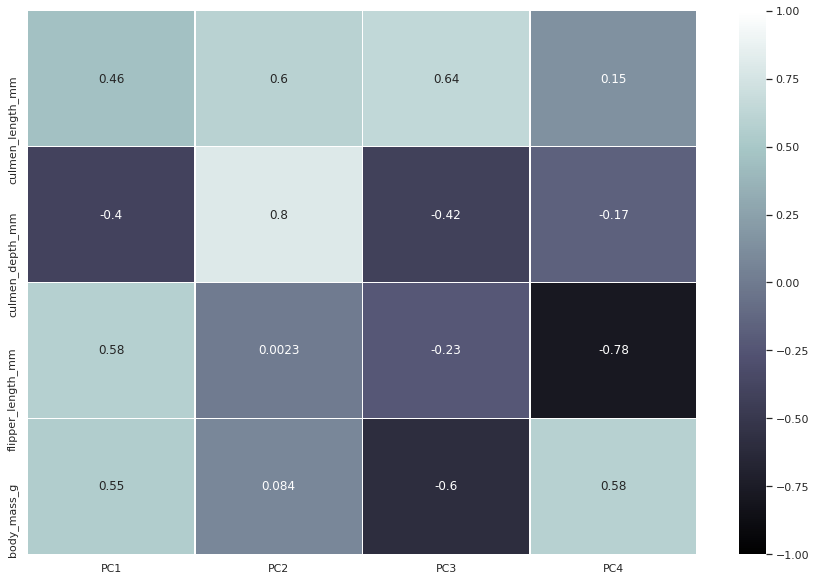

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)